In [82]:
from sageresearch.utils import symbolic_vector_matrix as svm
# Multidimensional chain rule
x = SR.symbol('x')
y = SR.symbol('y')
x_vec = vector([x, y])
xi = SR.symbol('xi')
eta = SR.symbol('eta')
xi_vec = vector([xi, eta])
b_1 = 1 * xi + 2 * eta + 3
b_2 = 4 * xi + 5 * eta + 6
b_vec = vector([b_1, b_2])
b_j = jacobian(b_vec, xi_vec)
dict_b = {x: b_1, y: b_2}
sol = solve([x == b_1, y == b_2], [xi, eta], solution_dict=True)
c_1 = xi.subs(sol)
c_2 = eta.subs(sol)
c_vec = vector([c_1, c_2])
c_j = jacobian(c_vec, x_vec)
assert c_j * b_j == matrix.identity(2)
assert b_j * c_j == matrix.identity(2)
dict_c = {xi: c_1, eta: c_2}
phi_i = x^2 * y + y^3 / x
phi = phi_i.subs(dict_b)

# grad_x \phi_i(x) = grad_xi \phi_i(b_i(xi)) (b_i'(xi))^{-1} = grad_xi \phi(xi) (b_i'(xi))^{-1}, when x = b_i(xi)
grad_phi_i = phi_i.gradient(x_vec).subs(dict_b)
grad_phi = phi.gradient(xi_vec)
assert grad_phi_i * b_j == grad_phi
assert grad_phi_i == grad_phi * c_j

# phi_i(x)_x = phi(xi)_{xi} c_1_x + phi(xi)_{eta} c_2_x = phi(xi)_{xi} c_j[0, 0] + phi(xi)_{eta} c_j[1, 0]
phi_i_x = phi_i.diff(x).subs(dict_b)
phi_i_y = phi_i.diff(y).subs(dict_b)
phi_xi = phi.diff(xi)
phi_eta = phi.diff(eta)
assert phi_i_x == phi_xi * c_j[0, 0] + phi_eta * c_j[1, 0]
assert phi_i_y == phi_xi * c_j[0, 1] + phi_eta * c_j[1, 1]

In [66]:
grad_phi_i * b_j - grad_phi

(0, 0)

In [70]:
grad_phi

(2*(5*eta + 4*xi + 6)*(2*eta + xi + 3) + 4*(2*eta + xi + 3)^2 - (5*eta + 4*xi + 6)^3/(2*eta + xi + 3)^2 + 12*(5*eta + 4*xi + 6)^2/(2*eta + xi + 3), 4*(5*eta + 4*xi + 6)*(2*eta + xi + 3) + 5*(2*eta + xi + 3)^2 - 2*(5*eta + 4*xi + 6)^3/(2*eta + xi + 3)^2 + 15*(5*eta + 4*xi + 6)^2/(2*eta + xi + 3))

In [71]:
c_j

[-5/3  2/3]
[ 4/3 -1/3]

In [74]:
(grad_phi * c_j)[1]

(2*eta + xi + 3)^2 + 3*(5*eta + 4*xi + 6)^2/(2*eta + xi + 3)

In [75]:
grad_phi[0] * c_j[0, 1] + grad_phi[1] * c_j[1, 1]

(2*eta + xi + 3)^2 + 3*(5*eta + 4*xi + 6)^2/(2*eta + xi + 3)

In [69]:
(grad_phi * c_j - grad_phi_i).simplify_full()

(0, 0)

In [48]:
c_j * b_j

[1 0]
[0 1]

In [39]:
grad_phi * b_j.inverse()

(-7/3*(3*eta + 2*xi + 1)^2 + 4/3*(3*eta + 2*xi + 1)*(2*eta + 3*xi + 2) - 7*(2*eta + 3*xi + 2)^2/(3*eta + 2*xi + 1) - 2/3*(2*eta + 3*xi + 2)^3/(3*eta + 2*xi + 1)^2, 4/3*(3*eta + 2*xi + 1)^2 + 2/3*(3*eta + 2*xi + 1)*(2*eta + 3*xi + 2) + 4*(2*eta + 3*xi + 2)^2/(3*eta + 2*xi + 1) - 1/3*(2*eta + 3*xi + 2)^3/(3*eta + 2*xi + 1)^2)

In [37]:
b_j

[1 2]
[4 5]

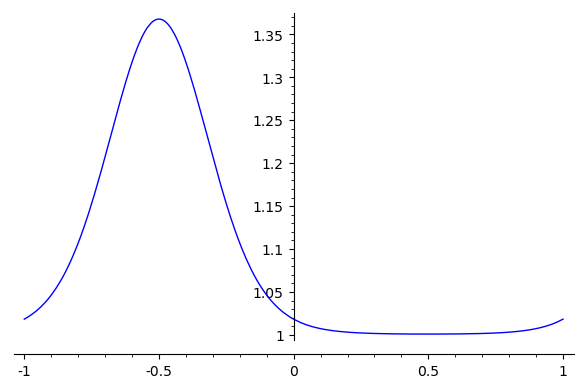

In [2]:
x = SR.symbol('x')
y = SR.symbol('y')
f = 1 + exp(3 * cos(pi * (x - -1/2)) - 4)
plot(f, x, -1, 1)

In [22]:
f = 1 + exp(2 * cos(pi * (x - -1/2)) + 2 * cos(pi * (y - -1/2)) - 5)
plot3d(f, (x, -1, 1), (y, -1, 1))

Graphics3d Object

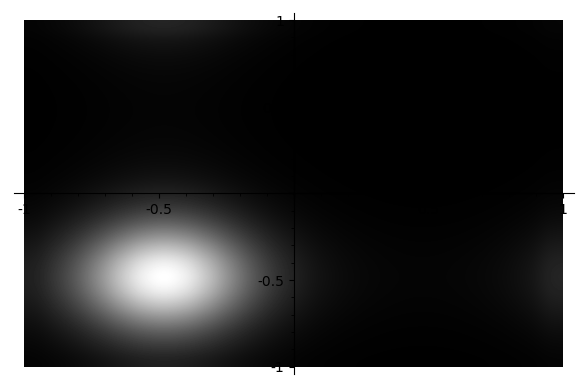

In [23]:
density_plot(f, (x, -1, 1), (y, -1, 1))